<div align="center">

# **ACTIVIDAD 2: ALGORITMO MADALINE**

---

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRerieaMJrxMRIysI8dT9J_r3EJGnR_-5Mb-A&s" alt="Logo de la Institución" width="400">

---
<h3>Universidad del Sur</h3>
<h3>Doctorado en Sistemas Computacionales</h3>
<h3>DSIC409 - Seminario de Redes Neuronales</h3>
<h3>Docente: Dr. Rodolfo Esteban Ibarra</h3>

<h3>Estudiante: Juan Carlos González Ibarra</h3>
<h3>Correo Institucional: jcgi.laboral@gmail.com</h3>

---
[Repositorio GitHub](https://github.com/Doctorado-UNISUR/Seminario_Redes_Neuronales/tree/main/Semana_2)
<h3>Fecha: 19 de junio, 2025</h3>

</div>

---

## Resumen

Este reporte detalla la implementación, análisis y evaluación de una red neuronal **MADALINE** (Multiple ADAptative LINear Element) para la resolución del problema de reconocimiento de letras.

Desarrollada por Bernard Widrow y Marcian Edward Hoff a principios de la década de 1960 en la Universidad de Stanford, la red MADALINE representa una arquitectura *feedforward* multicapa, que se distingue de modelos como el Perceptrón.

La unidad fundamental de MADALINE es la neurona **ADALINE** (*ADAptative LINear Element*), que a diferencia del Perceptrón, no solo ajusta sus pesos cuando se produce un error de clasificación binaria, sino que lo hace basándose en una salida continua. Este enfoque permite que los pesos se adapten de forma más eficiente, incluso si la clasificación final es formalmente correcta, lo que acelera la convergencia del algoritmo de aprendizaje.

Las reglas de aprendizaje fundamentales de MADALINE —la **Regla MADALINE I (MRI)** y la **Regla MADALINE II (MRII)**— operan bajo el principio de "*mínima perturbación*": solo se modifican los pesos de las unidades ADALINE en la capa oculta que contribuyeron directamente al error y que requieren el menor cambio posible para corregirlo.

La adaptabilidad de MADALINE representó un avance en la evolución de las técnicas de reconocimiento de patrones.

---

**Palabras Clave:** MADALINE, ADALINE, Redes Neuronales Artificiales, Clasificación. 


## I. Introducción

Existen diversos tipos de redes neuronales artificiales (RNA), que pueden clasificarse y diferenciarse de distintas maneras. Las clasificaciones más comunes se basan en:

- **Estructura:** Número de capas, tipo de neuronas, conexiones y funciones de activación.
- **Tipo de aprendizaje y operación:** Algoritmo de aprendizaje, supervisión y forma de evocación.
- **Aplicación:** Propósito o tarea que resuelven.

### Tipos de asociación

- **Hetero-asociativa:** El vector de entrada se asocia con un vector de salida diferente.
- **Auto-asociativa:** El vector de entrada se asocia consigo mismo (la salida es igual a la entrada).

### Funciones principales de las RNA

- Predicción
- Clasificación
- Asociación
- Filtrado
- Conceptualización
- Optimización

### Clasificación según aprendizaje y evocación

1. Redes con aprendizaje no supervisado y evocación retroalimentada.
2. Redes con aprendizaje no supervisado y evocación hacia adelante.
3. Redes con aprendizaje supervisado y evocación **retroalimentada.
4. **Redes con aprendizaje supervisado y evocación hacia adelante**.

Dentro de la categoría de aprendizaje supervisado y evocación hacia adelante se encuentran las redes que utilizan la neurona _ADALINE_.


## II. Antecedentes

### ADALINE

ADALINE fue desarrollada por Bernard Widrow y Marcian Edward Hoff (uno de los inventores del microprocesador) en la Universidad de Stanford en 1960. Esta fue llamada Adaptive Lineal Neuron, la principal contribución de ADALINE fue metodológica, porque se enfocaron en desarrollar sistemas adaptativos prácticos. Su aplicación se desarrolló en el filtrado adaptativo y el procesamiento de señales adaptativas, siendo la primera red neuronal aplicada a un problema real, en la eliminación de ecos en líneas telefónicas, después fue utilizada en aplicaciones de reconocimiento de voz, caracteres y predicción del tiempo.

Su estructura es muy similar a la del perceptrón, con dos capas: una capa de entrada (que admite valores continuos) y una capa de salida compuesta por una única neurona, ambas utilizan una función de umbral para realizar clasificaciones. La principal diferencia entre el perceptrón y ADALINE está en el procedimiento de aprendizaje utilizado para actualizar los pesos de la red. El perceptrón ajusta sus pesos comparando directamente el valor esperado y el valor predicho de la clase. Es decir, siempre trabaja con salidas discretas: compara +1 o -1 (valor predicho) con +1 o -1 (valor esperado). Como resultado, el perceptrón solo actualiza sus pesos cuando comete errores de clasificación.

En cambio, ADALINE calcula la diferencia entre el valor esperado de la clase (+1 o -1) y la salida continúa generada por la función lineal (ŷ), la cual puede tomar cualquier valor real. Esta diferencia que implica que ADALINE puede ajustar sus pesos incluso cuando la clasificación final fue correcta, porque la actualización depende del valor continuo, no del resultado binario final. Esto refiere que ADALINE aprende continuamente, no solo cuando comete errores. Esta propiedad permite encontrar una solución más rápida que el perceptrón para un mismo problema.

Figura 1. Diferencia entre Modelo Perceptrón y ADALINE


<div align="center">
<img src="img/Fig1.png" alt="Diferencia entre Modelo Perceptrón y ADALINE" width="800">
</div>

## Formulación matemática

ADALINE se define mediante dos componentes:  
• Una función lineal que agrega las señales de entrada.  
• Un procedimiento de aprendizaje que ajusta los pesos de conexión.

En función del problema a resolver, puede incorporarse una función de umbral (como en los modelos de McCulloch-Pitts o el perceptrón) para realizar la clasificación final. Sin embargo, esta función no forma parte del proceso de aprendizaje en sí, por lo que no es necesaria para definir o entrenar una red ADALINE.

### Función de agregación lineal

La función de agregación lineal en ADALINE es la misma que la utilizada en el perceptrón:

<div align="center">
<img src="img/Fig2.png" alt="Función de agregación lineal en ADALINE" width="800">
</div>

Esta función es suficiente cuando se trata de un problema de predicción con valores reales.



## Función de decisión por umbral

En problemas de clasificación binaria, se incorpora una función de umbral, similar a la del perceptrón. Para ello, se toma el signo de la salida de la función lineal:

$$
\hat{y} = 
\begin{cases}
+1 & \text{si } y > 0 \\
-1 & \text{si } y \leq 0
\end{cases}
$$

## La superficie de error en ADALINE

El término "*minimize the mean of the sum of squared errors – MSE*" (minimizar el promedio de los errores cuadráticos) es una expresión que refiere a reducir al mínimo posible la diferencia entre lo que un modelo predice y lo que realmente debería predecir.

El “error" describe la diferencia entre el valor esperado (real) y el valor predicho por el modelo.  
$$
\text{error} = y - \hat{y}
$$  
Donde:  
- $y$: valor real o esperado.  
- $\hat{y}$: valor predicho por el modelo.

Para calcular el error en ADALINE se calcula elevándolo al cuadrado:  
$$
\left( y - \hat{y} \right)^2
$$

- Se eleva al cuadrado la diferencia entre el valor esperado ($y$) y el valor predicho ($\hat{y}$) por la función lineal.  
- Se evita que errores negativos y positivos se cancelen entre sí.  
- Se penalizan más fuertemente los errores grandes.

Este proceso se repite para cada ejemplo del conjunto de datos, desde \( j = 1 \) hasta \( j = n \). Luego, se suman todos los errores cuadráticos:  
$$
\sum_{j=1}^{n} \left( y_j - \hat{y}_j \right)^2
$$

El MSE se obtiene dividiendo esa suma entre la cantidad total de ejemplos \( n \):  
$$
\text{mse} = \frac{1}{n} \sum_{j=1}^{n} \left( y_j - \hat{y}_j \right)^2
$$

En la Figura se muestra un ejemplo visual del método de mínimos cuadrados utilizando un solo predictor.

<div align="center">
<img src="img/Fig3.png" alt="Método de mínimos cuadrados" width="800">
</div>


---

El eje horizontal representa la característica ($x_1$) (predictor), mientras que el eje vertical muestra el valor a predecir ($\hat{y}$). Los puntos rosados representan los valores esperados reales (los datos observados).  
La función lineal $\hat{y} = w_1 b + w_2 x_1$ define una línea recta en el plano cartesiano. Lo importante aquí es que la pendiente (inclinación) y el intercepto (punto donde la línea cruza el eje y) están determinados por los pesos $w_1$ y $w_2$.

Los valores de $b$ (sesgo o término independiente) y $x_1$ (entrada) son datos conocidos y fijos; por tanto, no influyen directamente en la forma de la línea. La tarea del modelo es encontrar los pesos adecuados para que esa línea se ajuste lo mejor posible a los puntos reales, minimizando los errores cuadráticos.

El objetivo del algoritmo de mínimos cuadrados es generar el menor error acumulado posible, en otras palabras, se busca encontrar la línea que mejor se ajusta a los puntos en el plano cartesiano. Dado que los pesos son los únicos valores que podemos modificar para alterar la forma de esa línea, diferentes combinaciones de pesos generarán diferentes errores cuadráticos medios. Esto introduce el concepto de “superficie de error”, que es un espacio geométrico donde se busca el conjunto óptimo de pesos ($w_1$, $w_2$) (cuyos valores varían entre 0 y 1) que minimiza el MSE. En esta superficie:

- El error se cuantifica en un rango de 0 a 1 (equivalente al 0% - 100% de error proporcional).  
- Cada punto representa una combinación única de ($w_1$, $w_2$), proyectando su MSE correspondiente.

Se pueden graficar los valores de MSE para todas las combinaciones posibles de $w_1$ y $w_2$, el resultado representa una superficie de error:

<div align="center">
<img src="img/Fig4.png" alt="Superficie de error" width="800">
</div>

---

En este caso, la superficie tiene una forma similar a un cono o pirámide invertida, con un único punto donde el error alcanza su valor mínimo, incluso cero. Este punto se conoce en matemáticas como el **mínimo global**.

Cuando existe un único conjunto de pesos que minimiza completamente el error, estamos ante un problema de **optimización convexa**. Esto es ideal, ya que garantiza que el algoritmo podrá encontrar la mejor solución sin quedar atrapado en mínimos locales.

---


## Aprendizaje

El objetivo del modelo ADALINE es encontrar un conjunto de pesos que minimicen el MSE. Para ello, se utiliza el algoritmo conocido como descenso por gradiente (*gradient descent*). El descenso por gradiente es un método iterativo que ajusta los pesos de la red en la dirección que reduce más rápidamente el error. La idea es similar a la de un excursionista que quiere bajar desde la cima de una montaña hasta el fondo de un valle: el camino más efectivo es descender por la pendiente más pronunciada.

<div align="center">
<img src="img/Fig5.png" alt="gradient descent" width="500">
</div>

- El eje horizontal representa los valores posibles de los pesos $w_1$ y $w_2$.
- El eje vertical muestra el valor del MSE para cada combinación de esos pesos.
- La superficie de colores representa la forma del error, los puntos más altos tienen mayor error, y el fondo representa el menor error posible.
- La dirección del gradiente o pendiente actual indica la dirección del cambio más pronunciado en el error.
- La dirección de descenso óptima indica el camino que debe seguir el algoritmo para minimizar el error.

Para optimizar el modelo, es necesario ajustar los pesos calculando el gradiente mediante la regla de la cadena del cálculo diferencial.

---

## Algoritmo

Se define el error de la red como una función $E$, que representa el MSE:

$E(\hat{y}) = \frac{1}{n} \sum_{j=1}^{n} (y_j - \hat{y}_j)^2$

Si expandimos $\hat{y}_j$, obtenemos:

$E(w, x) = \frac{1}{n} \sum_{j=1}^{n} \left( y_j - \left( b + \sum_i w_i x_i \right)_j \right)^2$

Los únicos valores que se pueden modificar para afectar $\hat{y}$ son los pesos $w_i$, se trata de calcular cómo varía el error $E$ ante un pequeño cambio en los pesos $w$, lo que se conoce como **gradiente**, denotado por $\Delta$, en un punto del error de superficie.

Widrow y Hoff propusieron que en lugar de calcular el gradiente completo de todo el conjunto de datos, podemos aproximarlo calculando la derivada parcial del error con respecto a los pesos en cada iteración. Se eliminan los símbolos de sumatoria para simplificar la función de error, por lo que queda:

$e(w, x) = \left( y - (b + wx) \right)^2$

Aplicando la regla de la cadena del cálculo, se obtiene su gradiente:

<div align="center">
<img src="img/Fig6.png" alt="Ccadena del cálculo" width="500">
</div>


El gradiente resulta ser 2 veces la diferencia entre el valor esperado $y$ y el valor predicho $\hat{y}$, multiplicado por la entrada $x$.

## Regla de actualización de pesos

Ya que se conoce el gradiente $\Delta$, se puede definir la regla para actualizar los pesos:

$$
w_{j+1} = w_j + \eta \left( -\Delta_j \right)
$$

Donde:

- $w_j$ es el peso por actualizar,  
- $\eta$ es la tasa de aprendizaje o paso de descenso,  
- $-\Delta_j$ es el negativo del gradiente, que se utiliza para "bajar" la superficie de error —es decir, minimizar el error—, no aumentarlo.

## Elección del valor de $\eta$

- Si $\eta$ es demasiado grande, los pasos son muy amplios y el modelo "rebota" alrededor del mínimo sin alcanzarlo.

- Si $\eta$ es pequeño, los pasos son más precisos y eventualmente alcanzan el mínimo.  
  Sin embargo, usar un $\eta$ muy pequeño alarga el tiempo de entrenamiento. Por eso, normalmente se prueban varios valores hasta encontrar un equilibrio entre precisión y velocidad de convergencia.

<div align="center">
<img src="img/Fig7.png" alt="Elección del valor de E" width="500">
</div>

Sin embargo, usar un \eta muy pequeño alarga el tiempo de entrenamiento. Por eso, normalmente se prueban varios valores hasta encontrar un equilibrio entre precisión y velocidad de convergencia.

---

# Madaline (Multiple Adaline)

MADALINE fue desarrollada por Bernard Widrow y su estudiante Marcian Hoff en 1962, basándose directamente en su trabajo anterior sobre la red ADALINE, presentada en 1960. Ocupa un lugar significativo en la historia de la IA como la "primera red neuronal aplicada a un problema del mundo real". 

MADALINE es una arquitectura de red neuronal de alimentación directa (feedforward) de tres capas (entrada, oculta, salida), diseñada para clasificación. La capa oculta es compuesta por múltiples unidades ADALINE, situada entre la capa de entrada y la capa de salida final de MADALINE. 

Esto permitió a MADALINE realizar funciones no lineales, como resolver el problema XOR, a través de reglas de aprendizaje heurísticas y altamente especializadas (MR1, MR2), en lugar de depender de un método universal basado en gradientes.

## Arquitectura

Esta red está compuesta por múltiples unidades ADALINE conectadas en paralelo, cada una totalmente interconectada con la capa de entrada y seguida por una función de activación umbral (tipo signo). 

La red cuenta con una única neurona de salida (Madaline - M) que su función es entregar el valor que corresponde a la mayoría de sus entradas.

<div align="center">
<img src="img/Fig8.png" alt="Arquitectura Madaline" width="500">
</div>

- Cada Adaline usa función signo (salida ±1).  
- Salida binaria que solo puede discriminar entre dos clases.  
- Para más de dos clases, se requieren múltiples redes Madaline independientes (una por cada par de clases).

## Regla MADALINE 1 (MRI)

La Regla MADALINE 1 (MRI) fue de los primeros intentos de entrenar redes MADALINE multicapa. Se basa en dos capas para el aprendizaje:  

- Primera capa aborda las unidades ADALINE.  
- Segunda capa es responsable de combinar sus salidas y guiar el proceso de aprendizaje.  
- En la segunda capa incluye una unidad de voto por mayoría que determina la salida final de la red ($+1$ o $-1$) basándose en si hay más salidas positivas o negativas de las unidades ADALINE de la primera capa.  
- Si la salida de la red, determinada por el voto por mayoría, difiere de la salida objetivo-deseada (es decir, ocurre un error), entra en juego un mecanismo de "asignador de tareas".  
- Este mecanismo calcula el “número mínimo” de unidades ADALINE en la capa oculta cuyas salidas deben cambiar para corregir el error. Luego identifica y selecciona aquellas unidades ADALINE que están "más cerca de ser negativas" (si la salida deseada es $-1$ y la salida mayoritaria es $+1$) y les indica que ajusten sus pesos de acuerdo con la regla de aprendizaje de ADALINE.  

Esta regla se basó conceptualmente en un "principio de mínima perturbación", con el objetivo de realizar los cambios mínimos necesarios para corregir un error. El proceso durante el entrenamiento es:  

- Si la red responde correctamente a una entrada, no se realizan cambios en los pesos de la red.  
- Cuando ocurre un error, el algoritmo realiza el cambio más pequeño posible en los pesos de la red para corregir la respuesta errónea.  
- Los nuevos patrones de entrada se acomodan de una manera que perturbe menos la solución ya establecida por los patrones de entrada anteriores.  

<div align="center">
<img src="img/Fig9.png" alt="Arquitectura Madaline MRI" width="500">
</div>

## Regla MADALINE 2 (MRII)

La Regla MRII representó una mejora sobre la Regla 1, refinando el proceso de entrenamiento sobre el principio de mínima perturbación. MRII opera iterativamente sobre los datos de entrenamiento. Para cada dato en el que ocurre un error, procede de la siguiente manera:

- MRII comienza intentando ajustar las ADALINE en la primera capa (oculta).  
- Encuentra la unidad ADALINE (clasificador) de la capa oculta que tiene la menor confianza en su predicción actual (es decir, su salida analógica está más cerca de cero, lo que la hace "más cerca de cambiar").  
- El algoritmo invierte tentativamente el signo de salida de esta unidad menos confiada.  
- Luego evalúa si este cambio tentativo reduce el error general de la red. Si el error se reduce, el cambio de peso se acepta e implementa. Si no se produce una reducción de errores, la respuesta de la unidad de prueba se devuelve a su valor anterior.  
- Si los errores persisten después de que se hayan realizado todas las pruebas posibles de unidad única (es decir, invirtiendo una unidad a la vez), el algoritmo procede a adaptar las ADALINE de dos en dos (inversiones por pares). Si los errores persisten, continúa con pruebas de 3, 4, etc., unidades hasta que el error sea cero o no sea posible una mayor reducción.  
- Solo después de haber realizado lo mejor posible en la primera capa, cualquier error restante se corrige adaptando las ADALINE en la segunda capa (de salida).  

MRII demostró su capacidad para producir generalizaciones útiles, incluso cuando se entrenó con tan solo el uno por ciento de los patrones del espacio de entrada.

<div align="center">
<img src="img/Fig10.png" alt="Arquitectura Madaline MRII" width="500">
</div>

## Regla MADALINE 3

La Regla MADALINE 3 cambió en su arquitectura la función signo no diferenciable por las funciones de activación sigmoide. Posteriormente, esta regla se descubrió más tarde que era equivalente al algoritmo de retropropagación.

<div align="center">
<img src="img/Fig11.png" alt="Arquitectura Madaline MRIII" width="500">
</div>

### Adaline con no linealidad sigmoidal.

### Reglas de Entrenamiento de MADALINE

| Regla     | Año  | Principio Clave                        | Función de Activación | Características                                                                                 | Significado / Resultado                                      |
|-----------|-------|--------------------------------------|----------------------|------------------------------------------------------------------------------------------------|-------------------------------------------------------------|
| Regla (MRI)  | 1962  | Mínima Perturbación (Asignador de Tareas) | Signo                | Voto por mayoría + "asignador de tareas" que selecciona unidades más cercanas a la salida deseada. | Primer intento de entrenamiento multicapa, utilizado en la primera gran máquina MADALINE. |
| Regla (MRII) | 1988  | Mínima Perturbación (Adaptaciones de Prueba) | Signo                | Adaptaciones de prueba iterativas (inversiones de unidad única, por pares, multiunidad) de las unidades ocultas menos confiadas. | Heurística mejorada, demostró generalización a partir de datos pequeños.                    |
| Regla (MRIII)| N/A   | Descenso de Gradiente Diferenciable          | Sigmoide             | Equivalente a la retropropagación, permitiendo un aprendizaje eficiente basado en gradientes.    | Allanó el camino para los MLP modernos entrenados por retropropagación.                     |

---


## III. DESARROLLO

### Problema

Reconocimiento de letras del alfabeto a partir de características numéricas extraídas de imágenes.

### Objetivo

Implementar una red neuronal MADALINE en Python para resolver un problema de clasificación entre letras.


### Herramientas y Bibliotecas
- _NumPy_ es para operaciones matriciales y manipulación de arrays.
- _pandas_ es para la manipulación y análisis de datos estructurados, como la carga, limpieza y transformación de datasets.
- _matplotlib_ es para la creación de gráficos y visualización de datos, permitiendo representar patrones y resultados de manera visual.
- _scikit-learn_ es para preprocesamiento, codificación de clases, separación de datos, y métricas de evaluación.

In [1]:
!pip install numpy pandas matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable


### 1. Importación de Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tqdm.notebook import tqdm  # Para barras de progreso

In [3]:
# Configuración de visualización
plt.style.use('ggplot')
%matplotlib inline

### 2. Carga y Preprocesamiento de Datos

In [4]:
# Descargar dataset Letter Recognition de UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
column_names = ['letter'] + [f'feat_{i}' for i in range(16)]

In [5]:
# Cargar datos
print("Cargando dataset...")
data = pd.read_csv(url, header=None, names=column_names)
print(f"Dataset cargado. Dimensiones: {data.shape}")

Cargando dataset...
Dataset cargado. Dimensiones: (20000, 17)


#### Descripción del Dataset

- **Nombre:** Letter Recognition  
- **Fuente:** UCI Machine Learning Repository  
- **Tamaño:** 20,000 instancias  
- **Clase objetivo:** Una de las 26 letras mayúsculas del alfabeto (A-Z)

Las imágenes se generaron a partir de 20 fuentes tipográficas diferentes. Cada letra fue aleatoriamente distorsionada para asegurar variabilidad. Cada muestra se representó por 16 atributos geométricos que fueron escalados entre 0 y 15.

##### Atributos

| Atributo | Tipo      | Descripción                                        |
|----------|-----------|----------------------------------------------------|
| `lettr`  | Categórica| Letra mayúscula del alfabeto (A-Z)                |
| `x-box`  | Entero    | Posición horizontal de la caja delimitadora       |
| `y-box`  | Entero    | Posición vertical de la caja delimitadora         |
| `width`  | Entero    | Ancho de la caja                                   |
| `high`   | Entero    | Altura de la caja                                  |
| `onpix`  | Entero    | Número total de píxeles "encendidos"              |
| `x-bar`  | Entero    | Promedio en X de los píxeles "on"                 |
| `y-bar`  | Entero    | Promedio en Y de los píxeles "on"                 |
| `x2bar`  | Entero    | Varianza en X                                      |
| `y2bar`  | Entero    | Varianza en Y                                      |
| `xybar`  | Entero    | Correlación entre X e Y                            |
| `x2ybr`  | Entero    | Media de $X^2 \cdot Y$                             |
| `xy2br`  | Entero    | Media de $X \cdot Y^2$                             |
| `x-ege`  | Entero    | Conteo promedio de bordes de izquierda a derecha  |
| `xegvy`  | Entero    | Correlación de `x-ege` con Y                       |
| `y-ege`  | Entero    | Conteo promedio de bordes de abajo a arriba       |
| `yegvx`  | Entero    | Correlación de `y-ege` con X                       |

---

##### Patrones de entrenamiento

Se plantea un patrón de entrenamiento por cada letra del alfabeto, siendo este la representación ideal de la letra (sin errores). El mapa de bits para cada uno de estos patrones de entrenamiento:

<div align="center">
<img src="img/Fig12.png" alt="[Patrones ideales" width="500">
</div>

Adicionalmente se muestran patrones de entradas distorsionadas por cada letra del alfabeto:

<div align="center">
<img src="img/Fig13.png" alt="[Patrones distorsionados" width="500">
</div>

##### División del Dataset

- **Entrenamiento:** 16,000 muestras (80%)  
- **Prueba:** 4,000 muestras (20%)  
- El enfoque se centra en **clasificación binaria** (por ejemplo, comparar A contra B).


#### Etiquetar letras (A-Z) como números (0-25) usando LabelEncoder.

In [6]:
# Codificar letras como números (A=0, B=1, ..., Z=25)
le = LabelEncoder()
data['label'] = le.fit_transform(data['letter'])

#### Separar características (X) y etiquetas (y).

In [7]:
# Separar características y etiquetas
X = data.drop(['letter', 'label'], axis=1).values
y = data['label'].values

#### Escalar características al rango [-1, 1] con MinMaxScaler.

In [8]:
# Normalizar características a rango [-1, 1] (requerido por MADALINE)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

#### Dividir en entrenamiento (80%) y prueba (20%).

In [9]:
# Dividir datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nResumen del dataset:")
print(f"- Entrenamiento: {X_train.shape[0]} muestras")
print(f"- Prueba: {X_test.shape[0]} muestras")
print(f"- Número de clases: {len(le.classes_)} (A-Z)")
print(f"- Número de características: {X_train.shape[1]}")



Resumen del dataset:
- Entrenamiento: 16000 muestras
- Prueba: 4000 muestras
- Número de clases: 26 (A-Z)
- Número de características: 16


 ### 3. Arquitectura de la Red MADALINE para el Dataset de Letras

##### Capa de Entrada

- **Número de neuronas:** 16  
- Cada neurona corresponde a una característica numérica del dataset:  
  - `x-box`, `y-box`, `width`, `high`, `onpix`, `x-bar`, `y-bar`, `x2bar`, `y2bar`, `xybar`, `x2ybr`, `xy2br`, `x-ege`, `xegvy`, `y-ege`, `yegvx`  
- **Entrada:** Un vector de 16 valores enteros (normalizados a un rango adecuado como $[0,1]$ o $[-1,1]$)

##### Capa Oculta (ADALINE)

- **Número de neuronas:** Definido experimentalmente  
- Cada unidad ADALINE recibe todas las entradas (es una red completamente conectada):  
  - Calcula una suma ponderada de las entradas.  
  - Aplica una función de activación lineal seguida de una función de cuantificación (signo).  
  - Entrena sus pesos usando la **regla LMS** (*Least Mean Squares*), ajustando pesos si la salida es incorrecta.  
- **Salida de cada ADALINE:** Binaria: $+1$ o $-1$

##### Capa de Salida

- **Número de neuronas:** 1 (clasificación binaria)  
- Toma como entradas las salidas de los ADALINEs.  
- Aplica una **regla de decisión** (mayoría de votos) para determinar la clase.  
- **Salida esperada:**  
  - $+1$ → Clase A  
  - $-1$ → Clase B

<div align="center">
<img src="img/Fig14.png" alt="Arquitectura de la Red MADALINE" width="500">
</div>


##### Proceso de Entrenamiento

- Se selecciona una muestra de una letra y se compara con las demás letras del dataset.  
- Se codifican como:  
  - A → $+1$  
  - B → $-1$  
- Se entrena la red con el algoritmo **MRI** para actualizar pesos cuando la salida no coincide con la etiqueta.  
- El entrenamiento continúa hasta alcanzar una tasa de error mínima o un número máximo de épocas.


#### Implementación del Modelo MADALINE.

- **`Tipo de algoritmo de aprendizaje`**:
    - Aprendizaje supervisado (Supervised Learning)

- **`Técnica específica`**:
    - Regla MRI una heurística basada en la actualización selectiva de pesos.

- **`Proceso`**:

    1. Conversión binaria por clase:
        - Se entrena un clasificador binario por cada clase (A contra todas, B contra todas, etc.).

    2. Activación y salida:
        - Se usa np.sign(net) como función de activación → salida binaria: $+1$ o $-1$.

    3. Error:
        - Se calcula el error como la diferencia entre la salida deseada y la salida real:
        ```python
            error = y_binary[i] - final_output
        ```

    4. Regla de aprendizaje (MRI):
        - En caso de error, no se actualizan todos los pesos, sino solo la neurona con menor confianza (la más cercana a cambiar su signo):
        
        ```python
            closest_idx = np.argmin(np.abs(net))
            weights[closest_idx] += self.lr * error * X[i]
            biases[closest_idx] += self.lr * error

    5. Parada temprana:
        - Se detiene el entrenamiento cuando el error promedio cae por debajo de cierto umbral o se estabiliza.

In [10]:
class MadalineClassifier:
    def __init__(self, n_hidden=26, learning_rate=0.01, max_epochs=100):
        """
        Inicializa el clasificador MADALINE para múltiples clases.
        
        Parámetros:
            n_hidden: Número de neuronas en capa oculta (recomendado: 26-52)
            learning_rate: Tasa de aprendizaje (0.001-0.1)
            max_epochs: Máximo número de épocas de entrenamiento
        """
        self.n_hidden = n_hidden
        self.lr = learning_rate
        self.max_epochs = max_epochs
        self.classes_ = None
        self.classifiers = []
    
    def _initialize_weights(self, n_features):
        """Inicializa pesos con pequeños valores aleatorios"""
        sm = 0.001  # Rango pequeño para inicialización
        weights = np.random.uniform(-sm, sm, (self.n_hidden, n_features))
        biases = np.random.uniform(-sm, sm, self.n_hidden)
        return weights, biases
    
    def _binary_encoding(self, y, target_class):
        """Convierte a problema binario (1 para clase objetivo, -1 para otras)"""
        return np.where(y == target_class, 1, -1)
    
    def fit(self, X, y, verbose=1):
        """
        Entrena el modelo compoarando una clase contra todasd.
        
        Parámetros:
            X: Datos de entrenamiento (n_samples, n_features)
            y: Etiquetas (0 a n_classes-1)
            verbose: Nivel de verbosidad (0: silencioso, 1: progreso, 2: detallado)
        """
        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape
        
        print(f"\nEntrenando {len(self.classes_)} clasificadores...")
        
        for class_idx in tqdm(self.classes_, desc="Clasificadores"):
            # Convertir a problema binario
            y_binary = self._binary_encoding(y, class_idx)
            
            # Inicializar pesos
            weights, biases = self._initialize_weights(n_features)
            error_history = []
            
            for epoch in range(self.max_epochs):
                epoch_errors = []
                
                for i in range(n_samples):
                    # Propagación hacia adelante
                    net = np.dot(X[i], weights.T) + biases
                    outputs = np.sign(net)
                    final_output = np.sign(outputs.sum())  # Votación mayoritaria
                    
                    # Calcular error
                    error = y_binary[i] - final_output
                    epoch_errors.append(error**2)
                    
                    # MRI: Actualizar solo la neurona más confundida
                    if error != 0:
                        closest_idx = np.argmin(np.abs(net))
                        weights[closest_idx] += self.lr * error * X[i]
                        biases[closest_idx] += self.lr * error
                
                # Registrar error promedio
                mean_error = np.mean(epoch_errors)
                error_history.append(mean_error)
                
                # Condición de parada temprana
                if mean_error < 0.01 or (len(error_history) > 10 and 
                                       np.std(error_history[-10:]) < 0.001):
                    if verbose > 1:
                        print(f"Clase {chr(65 + class_idx)} convergió en época {epoch}")
                    break
            
            # Guardar clasificador entrenado
            self.classifiers.append({
                'weights': weights,
                'biases': biases,
                'errors': error_history
            })
    
    def predict(self, X):
        """Realiza predicciones multiclase"""
        scores = np.zeros((X.shape[0], len(self.classes_)))
        
        for i, clf in enumerate(self.classifiers):
            net = np.dot(X, clf['weights'].T) + clf['biases']
            scores[:, i] = np.sum(np.sign(net), axis=1)  # Suma de votos
        
        return np.argmax(scores, axis=1)
    
    def evaluate(self, X, y_true, plot_cm=True):
        """
        Evalúa el modelo y muestra métricas.
        
        Parámetros:
            X: Datos de prueba
            y_true: Etiquetas verdaderas
            plot_cm: Mostrar matriz de confusión
        """
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y_true)
        
        print(f"\nPrecisión global: {accuracy:.4f}")
        print("\nReporte de Clasificación:")
        print(classification_report(y_true, y_pred, target_names=le.classes_))
        
        if plot_cm:
            # Matriz de confusión
            cm = confusion_matrix(y_true, y_pred)
            plt.figure(figsize=(16, 14))
            sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
                        xticklabels=le.classes_, yticklabels=le.classes_,
                        cbar_kws={'label': 'Número de muestras'})
            plt.title('Matriz de Confusión (A-Z)', pad=20, fontsize=16)
            plt.xlabel('Predicción', fontsize=14)
            plt.ylabel('Verdadero', fontsize=14)
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
        
        return accuracy

**_MadalineClassifier_**: clase principal del modelo.
- **`_init_`**:
   - Inicializa los parámetros del modelo, como el número de neuronas ocultas (`n_hidden`), la tasa de aprendizaje (`learning_rate`) y el número máximo de épocas (`max_epochs`).

- **`initialize_weights`**:
   - Genera pesos y sesgos iniciales aleatorios para las neuronas ocultas. Esto asegura que el modelo comience con valores diferentes en cada ejecución.

- **`binary_encoding`**:
   - Convierte las etiquetas de clase en un formato binario (1 para la clase objetivo y -1 para las demás). Esto es necesario para entrenar clasificadores binarios en una estrategia "uno contra todos".

- **`fit`**:
   - Entrena el modelo para cada clase utilizando la regla de aprendizaje MADALINE I (MRI). 
   - Actualiza los pesos de las neuronas ocultas solo cuando ocurre un error, y selecciona la neurona más confundida para minimizar la perturbación.

- **`predict`**:
   - Realiza predicciones multiclase utilizando una estrategia de votación mayoritaria basada en las salidas de las neuronas ocultas.

- **`evaluate`**:
   - Calcula la precisión del modelo en un conjunto de prueba y genera un reporte de clasificación. También puede mostrar una matriz de confusión para analizar el rendimiento por clase.


### 4. Entrenamiento del Modelo

In [11]:
# Hiperparámetros
params = {
    'n_hidden': 52,      # 2 neuronas por clase
    'learning_rate': 0.005,
    'max_epochs': 100
}

In [12]:
# 3. Inicializar modelo
print("Inicializando modelo MADALINE...")
print("\nConfiguración del modelo:")
print(f"- Neuronas ocultas: {params['n_hidden']}")
print(f"- Tasa de aprendizaje: {params['learning_rate']}")
print(f"- Máximo de épocas: {params['max_epochs']}")

Inicializando modelo MADALINE...

Configuración del modelo:
- Neuronas ocultas: 52
- Tasa de aprendizaje: 0.005
- Máximo de épocas: 100


In [ ]:
print("Inicializando modelo MADALINE...")
model = MadalineClassifier(**params)

# Entrenar modelo
print("\nIniciando entrenamiento...")
model.fit(X_train, y_train, verbose=2)
plt.ioff()
plt.show()

print("\nEntrenamiento completado!")

# Mostrar MSE final y motivo de parada por clase
for i, clf in enumerate(model.classifiers):
    final_mse = clf['errors'][-1]
    clase = chr(65 + i)
    print(f"\n📘 Clase {clase} — MSE final: {final_mse:.5f}")

    if final_mse < 0.01:
        print("🟢 Detenido porque el MSE fue menor a 0.01 (criterio cumplido).")
    elif len(clf['errors']) > 10 and np.std(clf['errors'][-10:]) < 0.001:
        print("🟡 Detenido por convergencia: desviación estándar < 0.001 en últimas 10 épocas.")
    else:
        print("🔴 Detenido por alcanzar el número máximo de épocas.")


Inicializando modelo MADALINE...

Iniciando entrenamiento...

Entrenando 26 clasificadores...


Clasificadores:   0%|          | 0/26 [00:00<?, ?it/s]

Clase A convergió en época 39
Clase C convergió en época 63
Clase D convergió en época 59
Clase F convergió en época 54
Clase I convergió en época 41
Clase J convergió en época 73
Clase K convergió en época 35
Clase L convergió en época 44
Clase M convergió en época 40
Clase N convergió en época 59
Clase Q convergió en época 31
Clase R convergió en época 92
Clase T convergió en época 62
Clase U convergió en época 77
Clase V convergió en época 34
Clase W convergió en época 19
Clase Y convergió en época 86
Clase Z convergió en época 62

Entrenamiento completado!

📘 Clase A — MSE final: 0.00900
🟢 Detenido porque el MSE fue menor a 0.01 (criterio cumplido).

📘 Clase B — MSE final: 0.03200
🔴 Detenido por alcanzar el número máximo de épocas.

📘 Clase C — MSE final: 0.01650
🟡 Detenido por convergencia: desviación estándar < 0.001 en últimas 10 épocas.

📘 Clase D — MSE final: 0.03587
🟡 Detenido por convergencia: desviación estándar < 0.001 en últimas 10 épocas.

📘 Clase E — MSE final: 0.03019


### 5. Evaluación del Modelo

- **Cálculo de precisión global**  

- **Reporte de clasificación detallado**  
  - Incluye:
    - **Precision**
    - **Recall**
    - **F1-score**

- **Visualización de la matriz de confusión**  
  - Generada con `seaborn.heatmap()`  
  - Representa visualmente las predicciones vs. las clases verdaderas  
  - Ejes: etiquetas verdaderas vs. predichas  
  - Celdas: número de muestras clasificadas en cada categoría



Evaluando modelo...

Precisión global: 0.8815

Reporte de Clasificación:
              precision    recall  f1-score   support

           A       0.76      1.00      0.86       158
           B       0.78      0.89      0.83       153
           C       0.77      0.99      0.87       147
           D       0.76      0.96      0.85       161
           E       0.78      0.87      0.82       154
           F       0.80      0.86      0.83       155
           G       0.93      0.83      0.88       155
           H       0.79      0.82      0.81       147
           I       0.92      0.91      0.91       151
           J       0.89      0.91      0.90       149
           K       0.80      0.90      0.84       148
           L       0.98      0.89      0.93       152
           M       0.95      0.93      0.94       158
           N       0.92      0.87      0.90       157
           O       0.89      0.83      0.86       150
           P       0.95      0.88      0.92       161
       

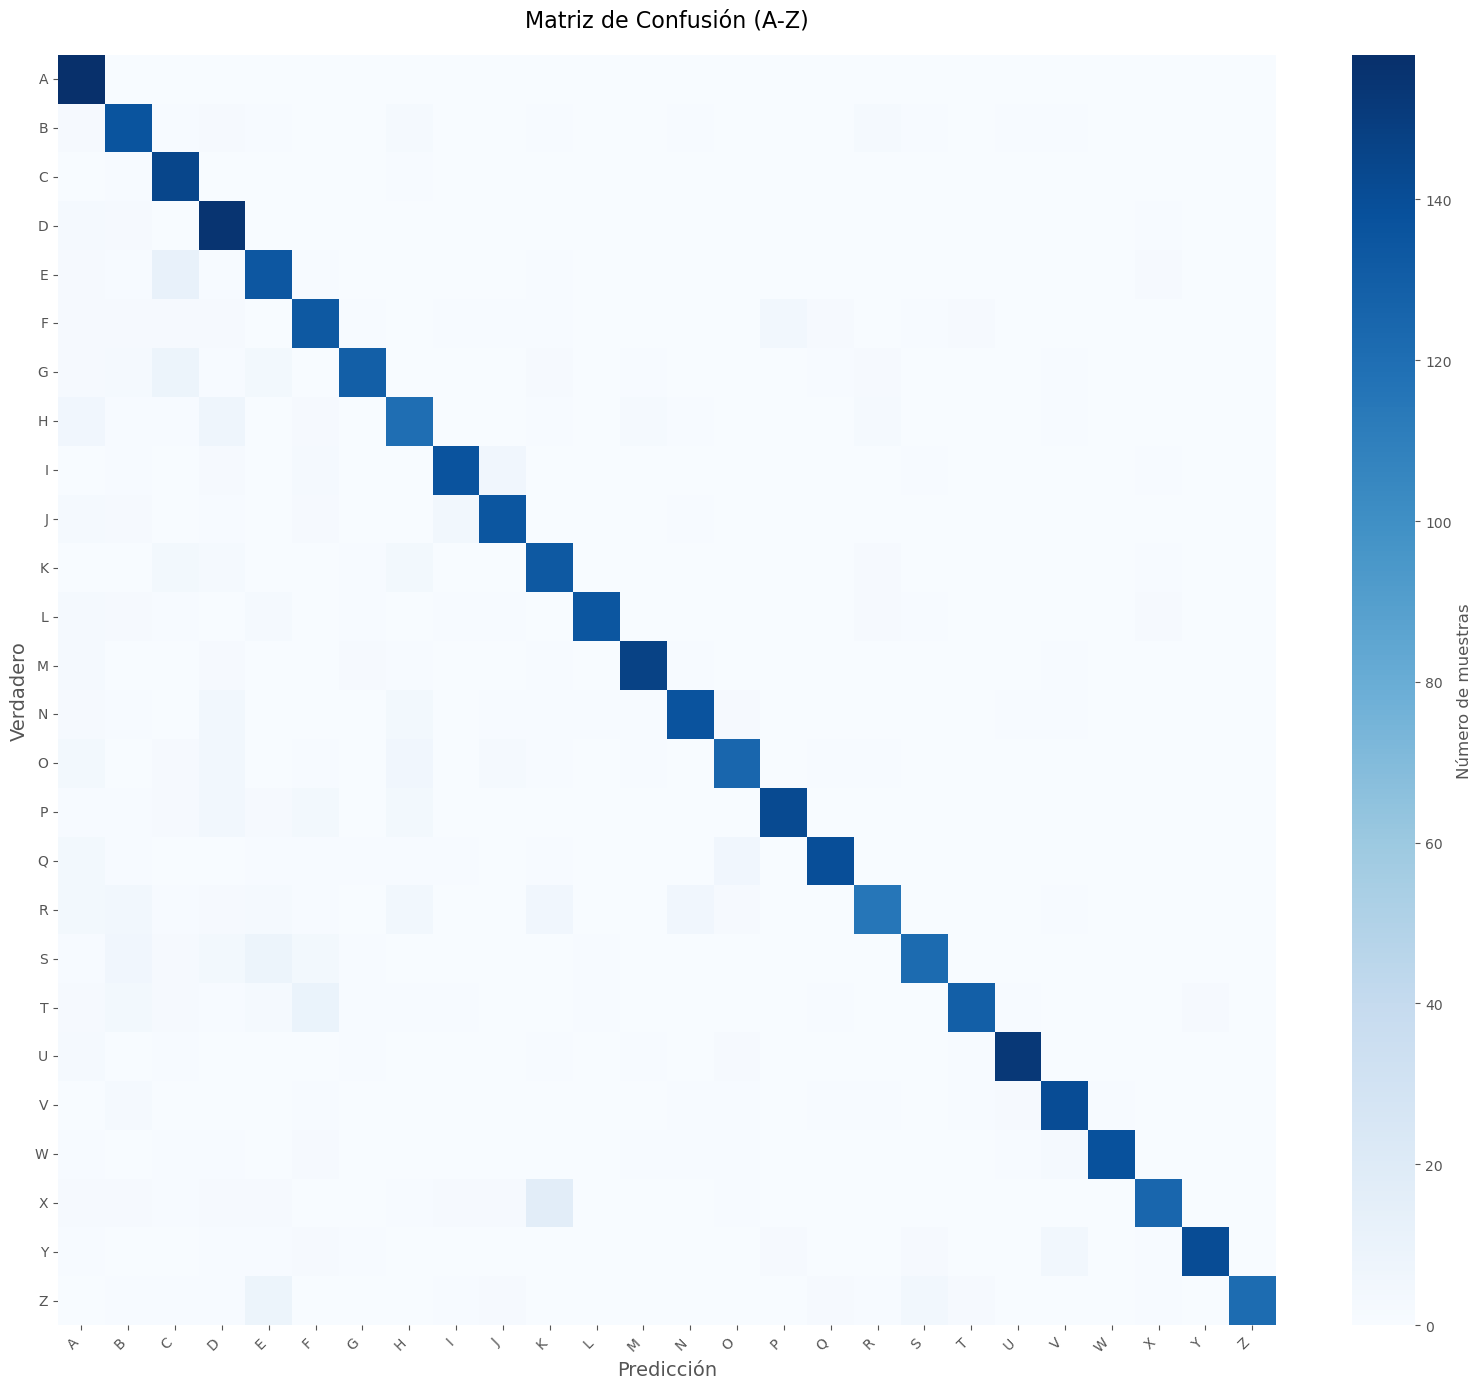

In [14]:
print("\nEvaluando modelo...")
test_accuracy = model.evaluate(X_test, y_test)

#### Resumen de Resultados del Modelo MADALINE

##### Precisión Global
- **Precisión global:** 88.15%

#### Interpretación de la Matriz de Confusión
La matriz de confusión muestra el desempeño del modelo MADALINE en la clasificación de letras del alfabeto (A-Z). 

##### Ejes de la Matriz
- **Eje vertical (Verdadero):** Representa las clases reales (letras verdaderas).
- **Eje horizontal (Predicción):** Representa las clases predichas por el modelo.

##### Elementos de la Matriz
- **Diagonal principal:** Cada celda en la diagonal muestra el número de muestras correctamente clasificadas para una letra específica.
- **Fuera de la diagonal:** Cada celda fuera de la diagonal muestra el número de muestras clasificadas erróneamente como otra letra.

#### Métricas por Clase
| Letra | Precisión | Recall | F1-Score | Soporte |
|-------|-----------|--------|----------|---------|
| A     | 0.76      | 1.00   | 0.86     | 158     |
| B     | 0.78      | 0.89   | 0.83     | 153     |
| C     | 0.77      | 0.99   | 0.87     | 147     |
| D     | 0.76      | 0.96   | 0.85     | 161     |
| E     | 0.78      | 0.87   | 0.82     | 154     |
| F     | 0.80      | 0.86   | 0.83     | 155     |
| G     | 0.93      | 0.83   | 0.88     | 155     |
| H     | 0.79      | 0.82   | 0.81     | 147     |
| I     | 0.92      | 0.91   | 0.91     | 151     |
| J     | 0.89      | 0.91   | 0.90     | 149     |
| K     | 0.80      | 0.90   | 0.84     | 148     |
| L     | 0.98      | 0.89   | 0.93     | 152     |
| M     | 0.95      | 0.93   | 0.94     | 158     |
| N     | 0.92      | 0.87   | 0.90     | 157     |
| O     | 0.89      | 0.83   | 0.86     | 150     |
| P     | 0.95      | 0.88   | 0.92     | 161     |
| Q     | 0.95      | 0.89   | 0.92     | 157     |
| R     | 0.88      | 0.76   | 0.82     | 151     |
| S     | 0.92      | 0.81   | 0.86     | 150     |
| T     | 0.96      | 0.81   | 0.88     | 159     |
| U     | 0.96      | 0.94   | 0.95     | 163     |
| V     | 0.91      | 0.92   | 0.92     | 153     |
| W     | 0.99      | 0.92   | 0.96     | 150     |
| X     | 0.93      | 0.80   | 0.86     | 157     |
| Y     | 0.99      | 0.90   | 0.94     | 157     |
| Z     | 1.00      | 0.82   | 0.90     | 147     |

#### Promedios
- **Promedio macro:**
  - Precisión: 0.89
  - Recall: 0.88
  - F1-Score: 0.88
- **Promedio ponderado:**
  - Precisión: 0.89
  - Recall: 0.88
  - F1-Score: 0.88

#### Observaciones
- Las letras con mejor desempeño (F1-Score más alto) incluyen **W**, **M**, y **U**.
- Las letras con menor desempeño (F1-Score más bajo) incluyen **A**, **B**, y **D**.
- El modelo muestra un buen balance entre precisión y recall en la mayoría de las clases.
- La mayoría de las muestras se encuentran en la diagonal principal, lo que indica que el modelo tiene un buen desempeño general.

#### **Errores:**
   - Algunas letras tienen confusiones significativas con otras. Por ejemplo:
     - **R** y **S** muestran errores frecuentes, lo que podría deberse a similitudes en sus características geométricas.
     - **X** y **Z** tienen errores con otras letras, posiblemente debido a su forma similar.

###### Nota: La matriz de confusión confirma que el modelo MADALINE tiene un buen desempeño en la clasificación de letras, con una precisión global del 88.15%. Sin embargo, las confusiones entre ciertas letras sugieren que podría beneficiarse de ajustes adicionales en el preprocesamiento de datos o en los hiperparámetros del modelo.





### 6. Predecir una Muestra por Cada Letra del Alfabeto

In [22]:
def letter_prediction(model, le, X_test, y_test, n_samples=1):
    """
    Parámetros:
        n_samples: Número de muestras a mostrar por letra (default: 1)
    """
    letters = le.classes_
    results = []
    
    for i, letter in enumerate(letters):
        # Encontrar todas las muestras de esta letra
        letter_idx = np.where(le.inverse_transform(y_test) == letter)[0]
        
        if len(letter_idx) > 0:
            # Seleccionar las primeras n_samples
            for sample_num in range(min(n_samples, len(letter_idx))):
                sample_idx = letter_idx[sample_num]
                sample = X_test[sample_idx].reshape(1, -1)
                true_label = le.inverse_transform([y_test[sample_idx]])[0]
                
                # Predecir
                pred_label_num = model.predict(sample)[0]
                pred_label = le.inverse_transform([pred_label_num])[0]
                
                # Calcular scores para todas las clases
                scores = np.zeros(len(letters))
                for j, clf in enumerate(model.classifiers):
                    net = np.dot(sample, clf['weights'].T) + clf['biases']
                    scores[j] = np.sum(np.sign(net))
                
                # Normalizar scores
                norm_scores = (scores - scores.min()) / (scores.max() - scores.min() + 1e-10)
                        
                if sample_num == 0:
                    plt.ylabel(letter, rotation=0, ha='right', va='center')
                
                results.append({
                    'Letra': true_label,
                    'Predicción': pred_label,
                    'Correcto': true_label == pred_label,
                    'Score Real': norm_scores[le.transform([true_label])[0]],
                    'Score Pred': norm_scores[le.transform([pred_label])[0]],
                    'Diferencia': abs(norm_scores[le.transform([true_label])[0]] - 
                                    norm_scores[le.transform([pred_label])[0]])
                })
    

    # Análisis de resultados
    results_df = pd.DataFrame(results)
    accuracy = results_df['Correcto'].mean()
    
    print(f"\nPrecisión en muestras seleccionadas: {accuracy:.2%}")
    print("\nLetras con peor desempeño:")
    display(results_df[results_df['Correcto'] == False].sort_values('Diferencia', ascending=False))
    
    return results_df

# Ejemplo de uso con 2 muestras por letra
results = letter_prediction(model, le, X_test, y_test, n_samples=2)


Precisión en muestras seleccionadas: 90.38%

Letras con peor desempeño:


,Letra,Predicción,Correcto,Score Real,Score Pred,Diferencia
13,G,R,False,0.750000,1.0,0.250000
38,T,E,False,0.833333,1.0,0.166667
33,Q,O,False,0.857143,1.0,0.142857
8,E,C,False,1.000000,1.0,0.000000
48,Y,V,False,1.000000,1.0,0.000000


### 7. Guardar Modelo

In [23]:
import pickle

# Guardar modelo
with open('madaline_letter_classifier.pkl', 'wb') as f:
    pickle.dump({
        'model': model,
        'scaler': scaler,
        'encoder': le
    }, f)

print("\nModelo guardado como 'madaline_letter_classifier.pkl'")


Modelo guardado como 'madaline_letter_classifier.pkl'


## IV. Conclusión

El análisis y la implementación de la red neuronal MADALINE en el reconocimiento de letras han permitido un aprendizaje de sus capacidades y limitaciones, así como de su importancia en el desarrollo de nuevos modelos y arquitecturas basados en el perceptrón. La arquitectura MADALINE, con su capa oculta de unidades ADALINE y la capa de salida basada en una decisión por mayoría, es capaz de resolver problemas de clasificación que no son lineales.

La funcionalidad de MADALINE está en las reglas de aprendizaje, en específico la aplicación de la MRI. Esta regla heurística ajusta los pesos de las neuronas ADALINE de la capa oculta basándose en el "principio de mínima perturbación", esto significa en la práctica que el sistema busca la unidad (o unidades) menos perturbada para modificar su estado cuando se produce un error en la salida final. Esto optimiza el proceso de aprendizaje al minimizar los cambios bruscos en la configuración de la red y a una mayor estabilidad en la solución.

La práctica con el conjunto de datos "Letter Recognition" sirvió como pruebas para la implementación de MADALINE, en como estos modelos podían abordar tareas complejas de reconocimiento de patrones del mundo real. Esto permite comprender los modelos de aprendizaje multicapa y avanzar en la aplicación de nuevos modelos como el backpropagation. En conclusión, el modelo MADALINE es la prueba de la solución a problemas no lineales y en entornos reales, que ayudaron a fortalecer las áreas de reconocimiento en el aprendizaje automático y la inteligencia artificial actual.

---

## V. Referencias Bibliográficas

- Aradillas Jaramillo, J. C. (2017). *Reconocimiento de texto manuscrito con deep learning* [Trabajo de fin de máster, Universidad de Sevilla]. Escuela Técnica Superior de Ingeniería.

- Lewis, P. M. II, & Coates, C. L. (1967). *Threshold logic*. John Wiley and Sons.

- Ramírez, J. A., & Chacón, M. I. (2011). Redes neuronales artificiales para el procesamiento de imágenes, una revisión de la última década. *Revista de Ingeniería Eléctrica, Electrónica y Computación*, 9(1). https://rieec.unach.mx

- Slate, D. (1990). *Letter recognition* [Dataset]. *UCI Machine Learning Repository*. https://doi.org/10.24432/C5ZP40

- Talbert, L. R., Groner, G. F., & Koford, J. S. (1963). Real-time adaptive speech-recognition system. *The Journal of the Acoustical Society of America*, 35(5), 807. https://doi.org/10.1121/1.1918630

- TutorialsPoint. (2023, July 19). *Adaline and Madaline network*. https://www.tutorialspoint.com/adaline-and-madaline-network

- Widrow, B. (1962). Generalization and information storage in networks of adaline ‘neurons’. In M. C. Yovitz, G. T. Jacobi, & G. D. Goldstein (Eds.), *Self-organizing systems 1962* (pp. 435–461). Spartan Books.

- Widrow, B., & Hoff, M. E. (1960). *Adaptive switching circuits* (No. TR-1553-1). Stanford University, Stanford Electronics Labs.

- Widrow, B., & Lehr, M. A. (1990). 30 years of adaptive neural networks: Perceptron, Madaline, and backpropagation. *Proceedings of the IEEE*, 78(9), 1415–1442. https://doi.org/10.1109/5.58356

- Widrow, B., & Lehr, M. A. (1995). Perceptrons, Adalines, and backpropagation. In M. A. Arbib (Ed.), *The handbook of brain theory and neural networks* (pp. 719–724). MIT Press.

---